In [1]:
import torch
torch.ones(10).cuda()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0')

In [2]:
!conda list

# packages in environment at /home/explore/miniconda3/envs/stablebaselines3:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_pytorch_select           0.1                       cpu_0  
absl-py                   0.12.0                   pypi_0    pypi
atari-py                  0.2.6                    pypi_0    pypi
attrs                     20.3.0             pyhd3deb0d_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                        py_2    conda-forge
backports.functools_lru_cache 1.6.1                      py_0    conda-forge
blas                      1.0                         mkl  
bleach                    3.3.0              pyh44b312d_0    conda-forge
box2d                     2.3.10                   pypi_0    pypi
box2d-py                  2.3.8                    pypi_0    pypi
ca-certificates           2021.1.19      

In [3]:
#export

import gym

from stable_baselines3 import A2C
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import CheckpointCallback, EvalCallback

# Save a checkpoint every 1000 steps
checkpoint_callback = CheckpointCallback(save_freq=5000, save_path="./logs/",
                                         name_prefix="rl_model")

# Evaluate the model periodically
# and auto-save the best model and evaluations
# Use a monitor wrapper to properly report episode stats
eval_env = Monitor(gym.make("LunarLander-v2"))
# Use deterministic actions for evaluation
eval_callback = EvalCallback(eval_env, best_model_save_path="./logs/",
                             log_path="./logs/", eval_freq=2000,
                             deterministic=True, render=False)

# Train an agent using A2C on LunarLander-v2
model = A2C("MlpPolicy", "LunarLander-v2", verbose=1)
model.learn(total_timesteps=20000, callback=[checkpoint_callback, eval_callback])

# Retrieve and reset the environment
env = model.get_env()
obs = env.reset()

# Query the agent (stochastic action here)
action, _ = model.predict(obs, deterministic=False)

Using cuda device
Creating environment from the given name 'LunarLander-v2'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 93.4     |
|    ep_rew_mean        | -355     |
| time/                 |          |
|    fps                | 333      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.29    |
|    explained_variance | -0.00392 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -6.4     |
|    value_loss         | 51.4     |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 92        |
|    ep_rew_mean        | -348      |
| time/                 |           |
|    fps                | 40

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 145      |
|    ep_rew_mean        | -356     |
| time/                 |          |
|    fps                | 304      |
|    iterations         | 1300     |
|    time_elapsed       | 21       |
|    total_timesteps    | 6500     |
| train/                |          |
|    entropy_loss       | -0.759   |
|    explained_variance | -0.179   |
|    learning_rate      | 0.0007   |
|    n_updates          | 1299     |
|    policy_loss        | 13.2     |
|    value_loss         | 292      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 147      |
|    ep_rew_mean        | -348     |
| time/                 |          |
|    fps                | 312      |
|    iterations         | 1400     |
|    time_elapsed       | 22       |
|    total_timesteps    | 7000     |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 183      |
|    ep_rew_mean        | -277     |
| time/                 |          |
|    fps                | 264      |
|    iterations         | 2500     |
|    time_elapsed       | 47       |
|    total_timesteps    | 12500    |
| train/                |          |
|    entropy_loss       | -0.274   |
|    explained_variance | 0.00562  |
|    learning_rate      | 0.0007   |
|    n_updates          | 2499     |
|    policy_loss        | 0.257    |
|    value_loss         | 22.5     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 185      |
|    ep_rew_mean        | -273     |
| time/                 |          |
|    fps                | 268      |
|    iterations         | 2600     |
|    time_elapsed       | 48       |
|    total_timesteps    | 13000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 193      |
|    ep_rew_mean        | -239     |
| time/                 |          |
|    fps                | 264      |
|    iterations         | 3700     |
|    time_elapsed       | 69       |
|    total_timesteps    | 18500    |
| train/                |          |
|    entropy_loss       | -0.437   |
|    explained_variance | -0.0282  |
|    learning_rate      | 0.0007   |
|    n_updates          | 3699     |
|    policy_loss        | -0.00583 |
|    value_loss         | 0.00272  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -231     |
| time/                 |          |
|    fps                | 268      |
|    iterations         | 3800     |
|    time_elapsed       | 70       |
|    total_timesteps    | 19000    |
| train/                |          |
|

In [5]:
#generate py from ipynb
#code from Jeremy Howard (fastai v2)
#!python notebook2script.py "00D059_init_and_import.ipynb"
!python notebook2script.py --fnameout="handson.py"  "01 - hands-on.ipynb"

Converted 01 - hands-on.ipynb to exp/handson.py


# Pendulum

In [6]:
import gym
from stable_baselines3 import SAC
# Train an agent using Soft Actor-Critic on Pendulum-v0
env = gym.make("Pendulum-v0")
model = SAC("MlpPolicy", env, verbose=1)
# Train the model
model.learn(total_timesteps=20000)
# Save the model
model.save("sac_pendulum")
# Load the trained model
model = SAC.load("sac_pendulum")
# Start a new episode
obs = env.reset()
# What action to take in state `obs`?
action, _ = model.predict(obs, deterministic=True)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 200       |
|    ep_rew_mean        | -1.45e+03 |
| time/                 |           |
|    episodes           | 4         |
|    fps                | 114       |
|    time_elapsed       | 6         |
|    total timesteps    | 800       |
| train/                |           |
|    actor_loss         | 22.6      |
|    critic_loss        | 2.72      |
|    ent_coef           | 0.812     |
|    ent_coef_loss      | -0.342    |
|    entropy_loss       | -0.611    |
|    explained_variance | -2.56     |
|    learning_rate      | 0.0003    |
|    n_updates          | 699       |
|    policy_loss        | 0.558     |
|    value_loss         | 2         |
-------------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
| 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -635     |
| time/              |          |
|    episodes        | 60       |
|    fps             | 98       |
|    time_elapsed    | 122      |
|    total timesteps | 12000    |
| train/             |          |
|    actor_loss      | 103      |
|    critic_loss     | 104      |
|    ent_coef        | 0.291    |
|    ent_coef_loss   | -0.232   |
|    learning_rate   | 0.0003   |
|    n_updates       | 11899    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -599     |
| time/              |          |
|    episodes        | 64       |
|    fps             | 98       |
|    time_elapsed    | 130      |
|    total timesteps | 12800    |
| train/             |          |
|    actor_loss      | 98.2     |
|    critic_loss     | 5.23     |
|    ent_coef 

# Cartpole with A2C

In [7]:
import gym

from stable_baselines3 import A2C

env = gym.make('CartPole-v1')

model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10000)

obs = env.reset()
for i in range(1000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40.8     |
|    ep_rew_mean        | 40.8     |
| time/                 |          |
|    fps                | 561      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    actor_loss         | 66.8     |
|    critic_loss        | 9.72     |
|    ent_coef           | 0.182    |
|    ent_coef_loss      | -0.214   |
|    entropy_loss       | -0.633   |
|    explained_variance | -0.77    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.46     |
|    value_loss         | 9.81     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 34.2     |
|    ep_rew_mean 

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 41.4     |
|    ep_rew_mean        | 41.4     |
| time/                 |          |
|    fps                | 560      |
|    iterations         | 1400     |
|    time_elapsed       | 12       |
|    total_timesteps    | 7000     |
| train/                |          |
|    entropy_loss       | -0.611   |
|    explained_variance | -0.0199  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1399     |
|    policy_loss        | 0.49     |
|    value_loss         | 2.01     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 44.1     |
|    ep_rew_mean        | 44.1     |
| time/                 |          |
|    fps                | 563      |
|    iterations         | 1500     |
|    time_elapsed       | 13       |
|    total_timesteps    | 7500     |
| train/                |          |
|

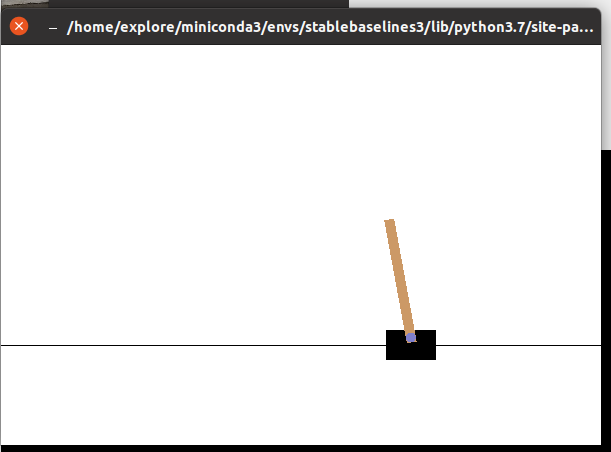

# DQN lunarlander

In [ ]:
import gym

from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy


# Create environment
env = gym.make('LunarLander-v2')

# Instantiate the agent
model = DQN('MlpPolicy', env, verbose=1)
# Train the agent
model.learn(total_timesteps=int(2e5))
# Save the agent
model.save("dqn_lunar")
del model  # delete trained model to demonstrate loading

# Load the trained agent
model = DQN.load("dqn_lunar", env=env)

# Evaluate the agent
# NOTE: If you use wrappers with your environment that modify rewards,
#       this will be reflected here. To evaluate with original rewards,
#       wrap environment in a "Monitor" wrapper before other wrappers.
mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)

# Enjoy trained agent
obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = env.step(action)
    env.render()


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 71.8      |
|    ep_rew_mean        | -125      |
|    exploration rate   | 0.986     |
| time/                 |           |
|    episodes           | 4         |
|    fps                | 5617      |
|    time_elapsed       | 0         |
|    total timesteps    | 287       |
| train/                |           |
|    entropy_loss       | -0.548    |
|    explained_variance | -3.37e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2000      |
|    policy_loss        | 0.393     |
|    value_loss         | 0.367     |
-------------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.2     |
|    ep_rew_mean      | -126     |
|    exploration rate | 0.967    |
| time/               |          |
|    episod

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.9     |
|    ep_rew_mean      | -181     |
|    exploration rate | 0.608    |
| time/               |          |
|    episodes         | 88       |
|    fps              | 5408     |
|    time_elapsed     | 1        |
|    total timesteps  | 8263     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.5     |
|    ep_rew_mean      | -180     |
|    exploration rate | 0.592    |
| time/               |          |
|    episodes         | 92       |
|    fps              | 5414     |
|    time_elapsed     | 1        |
|    total timesteps  | 8598     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.2     |
|    ep_rew_mean      | -176     |
|    exploration rate | 0.57     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.5     |
|    ep_rew_mean      | -187     |
|    exploration rate | 0.219    |
| time/               |          |
|    episodes         | 176      |
|    fps              | 5373     |
|    time_elapsed     | 3        |
|    total timesteps  | 16434    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.2     |
|    ep_rew_mean      | -182     |
|    exploration rate | 0.203    |
| time/               |          |
|    episodes         | 180      |
|    fps              | 5377     |
|    time_elapsed     | 3        |
|    total timesteps  | 16778    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.9     |
|    ep_rew_mean      | -186     |
|    exploration rate | 0.186    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.2     |
|    ep_rew_mean      | -186     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 264      |
|    fps              | 5337     |
|    time_elapsed     | 4        |
|    total timesteps  | 24262    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.7     |
|    ep_rew_mean      | -184     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 5332     |
|    time_elapsed     | 4        |
|    total timesteps  | 24650    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.7     |
|    ep_rew_mean      | -184     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.7     |
|    ep_rew_mean      | -181     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 352      |
|    fps              | 5344     |
|    time_elapsed     | 6        |
|    total timesteps  | 32482    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.4     |
|    ep_rew_mean      | -181     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 356      |
|    fps              | 5347     |
|    time_elapsed     | 6        |
|    total timesteps  | 32813    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.5     |
|    ep_rew_mean      | -181     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.4     |
|    ep_rew_mean      | -182     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 440      |
|    fps              | 5352     |
|    time_elapsed     | 7        |
|    total timesteps  | 40483    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.9     |
|    ep_rew_mean      | -184     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 444      |
|    fps              | 5352     |
|    time_elapsed     | 7        |
|    total timesteps  | 40908    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92       |
|    ep_rew_mean      | -184     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.1     |
|    ep_rew_mean      | -201     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 528      |
|    fps              | 5348     |
|    time_elapsed     | 9        |
|    total timesteps  | 48786    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.2     |
|    ep_rew_mean      | -205     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 532      |
|    fps              | 5348     |
|    time_elapsed     | 9        |
|    total timesteps  | 49160    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94       |
|    ep_rew_mean      | -211     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 407      |
|    ep_rew_mean      | -304     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 596      |
|    fps              | 1016     |
|    time_elapsed     | 84       |
|    total timesteps  | 86350    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.684    |
|    n_updates        | 9087     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 426      |
|    ep_rew_mean      | -303     |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 600      |
|    fps              | 977      |
|    time_elapsed     | 90       |
|    total timesteps  | 88705    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.931    |
|    n_updates      